In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [177]:
df = pd.read_csv("drive/MyDrive/Datasets/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [179]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [180]:
df = df.drop(['month', 'day', 'X', 'Y'], axis=1)

## Identify missing values and fill it with the mean.

In [181]:
if df.isnull().values.any():
  print("Null values present")
else:
  print("No null values")

No null values


## Find out how the data is skewed and identify the kurtosis value

In [182]:
df.skew(numeric_only=True)

FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

In [183]:
df.kurt(numeric_only=True)

FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64

## Categorical and Numerical Data

In [184]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns", numerical_cols)
print("Categorical Columns", cat_cols)

Numerical Columns ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Categorical Columns []


## Label Encoding for categorical data

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Identify the outliers and plot it.

<ipython-input-186-1dd361964b2a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,k)


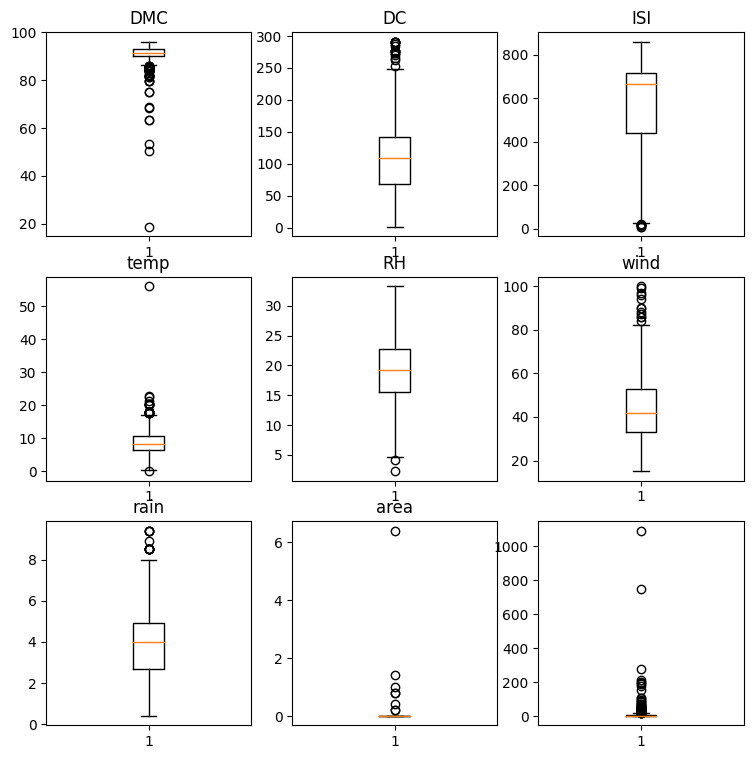

In [186]:
# plot the boxplot for all columns
# plt.boxplot(df.values, labels=df.columns)
plt.figure(figsize=(9,9))

k = 1
for i in df.columns:
  plt.title(i)
  plt.subplot(3,3,k)
  plt.boxplot(df[i])
  k += 1


In [187]:
## Remove outliers
print(df.shape[0])
from scipy import stats

for col in df.columns:
  z_scores = stats.zscore(df[col])
  threshold = 3
  df = df[(z_scores < threshold)]
print(df.shape[0])

517
499


<ipython-input-188-e0ee6b48500f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,k)


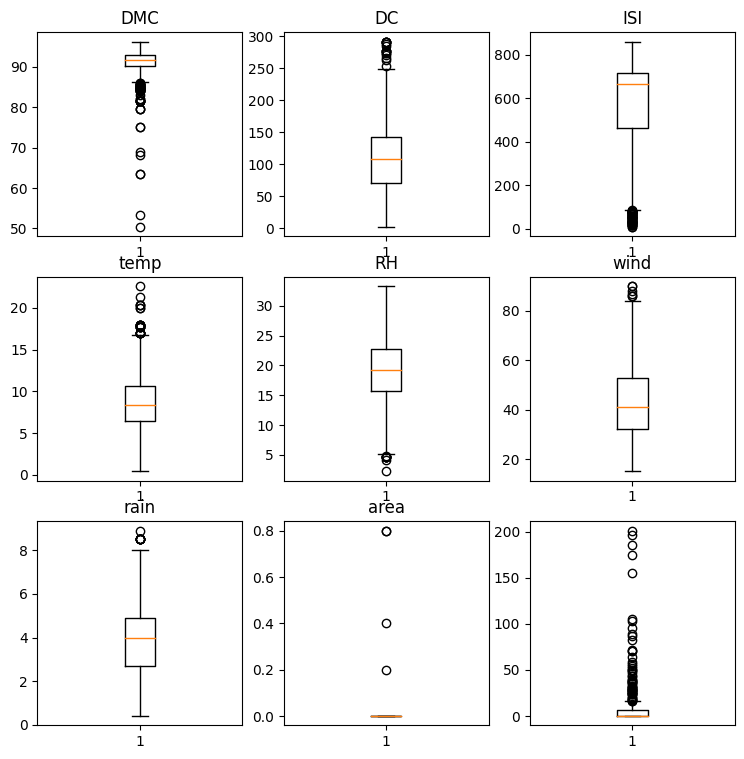

In [188]:
plt.figure(figsize=(9,9))

k = 1
for i in df.columns:
  plt.title(i)
  plt.subplot(3,3,k)
  plt.boxplot(df[i])
  k += 1

## Scaling

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(['area'], axis=1)
y = df['area']

X = scaler.fit_transform(X)



## Prepare data for modelling

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression Model

In [191]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

## Area prediction

In [192]:
y_pred = lr.predict(X_test)

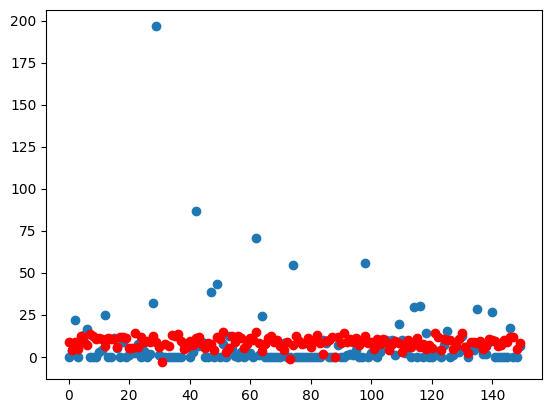

In [193]:
plt.scatter(np.arange(len(y_test)), y_test)
plt.scatter(np.arange(len(y_pred)), y_pred, c='r')

## Perfomance Analysis

In [194]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 408.57
Root mean squared error: 20.21
R-squared: 0.00
